In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("MarketPricePrediction.csv")
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10222    False
10223    False
10224    False
10225    False
10226    False
Length: 10227, dtype: bool

In [5]:
df['date'] = pd.to_datetime(df['date'])
df

C:\Users\hp\AppData\Local\Temp\ipykernel_18844\1621113520.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01
...,...,...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA,2011-12-01
10223,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA,2012-12-01
10224,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA,2013-12-01
10225,YEOLA(MS),December,2014,201077,446,1654,1456,MS,YEOLA,2014-12-01


In [6]:
import matplotlib.pyplot as plt

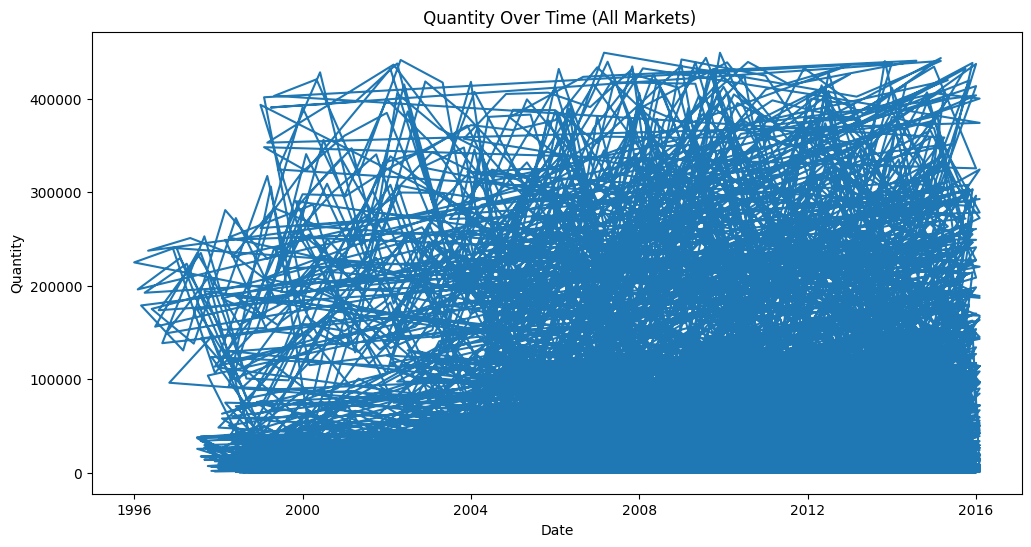

In [52]:
# Plot the average quantity
plt.figure(figsize=(12, 6))
plt.plot(df['quantity'])
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title(' Quantity Over Time (All Markets)')
plt.show()

In [8]:
avg_quantity_over_time = df.groupby('date')['quantity'].mean()

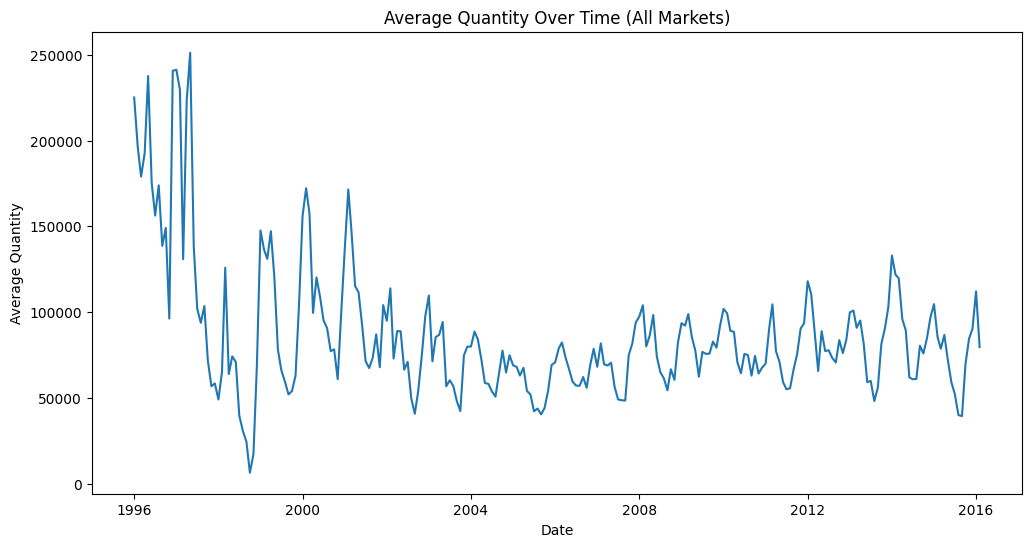

In [9]:
# Plot the average quantity
plt.figure(figsize=(12, 6))
plt.plot(avg_quantity_over_time.index, avg_quantity_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Quantity')
plt.title('Average Quantity Over Time (All Markets)')
plt.show()

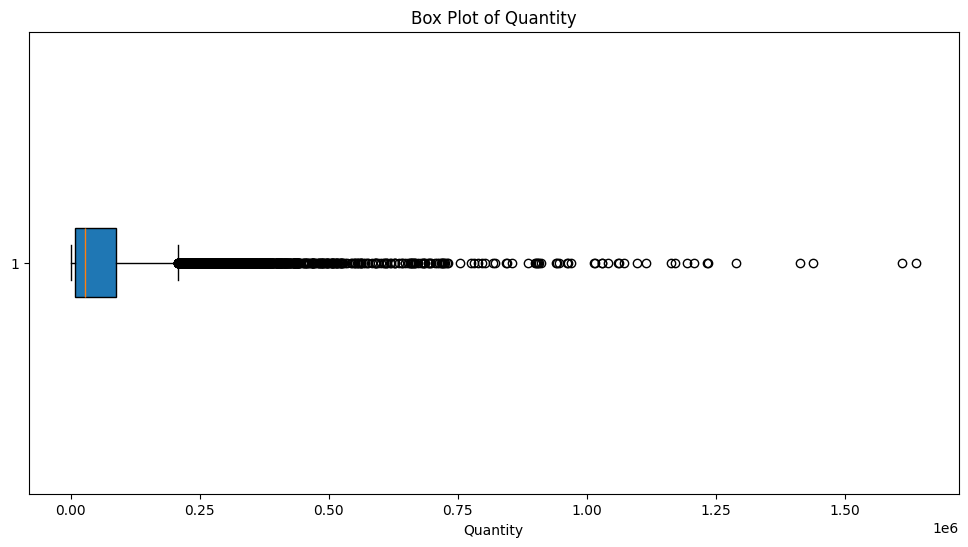

In [10]:
# Create a box plot for quantity
plt.figure(figsize=(12, 6))
plt.boxplot(df['quantity'], vert=False, patch_artist=True)
plt.xlabel('Quantity')
plt.title('Box Plot of Quantity')
plt.show()

In [11]:
import numpy as np

In [12]:
# Calculate z-scores
z_scores = np.abs((df['quantity'] - df['quantity'].mean()) / df['quantity'].std())

# Identify potential outliers
outliers = df[z_scores > 3]

# Print or analyze the outliers
print(outliers)

               market     month  year  quantity  priceMin  priceMax  priceMod  \
383    AHMEDNAGAR(MS)     March  2014    453107       100       960       598   
490    AHMEDNAGAR(MS)  December  2014    474988       127      2249      1175   
724         BANGALORE   January  2012    531906       161       736       583   
726         BANGALORE   January  2014    606710       404      1296      1094   
727         BANGALORE   January  2015    583681       313      1967      1602   
...               ...       ...   ...       ...       ...       ...       ...   
9550      SOLAPUR(MS)  December  2013    855182       161      2185      1222   
9551      SOLAPUR(MS)  December  2014    962233       135      2271      1035   
9552      SOLAPUR(MS)  December  2015    610943       142      2382      1069   
10098       YEOLA(MS)  February  2008    480702       145       279       219   
10102       YEOLA(MS)  February  2012    495756       200       353       296   

      state        city    

In [13]:
df = df[z_scores <= 3]

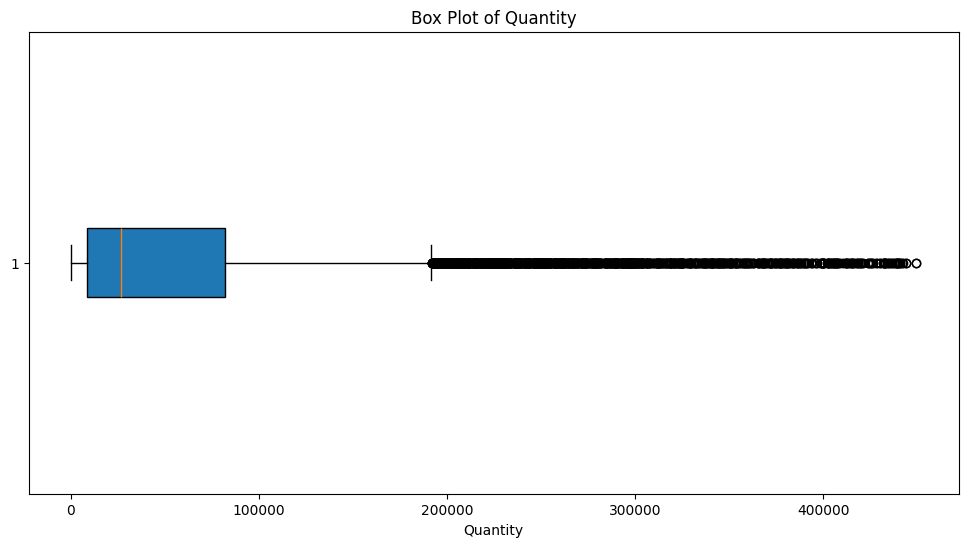

In [14]:
# Create a box plot for quantity
plt.figure(figsize=(12, 6))
plt.boxplot(df['quantity'], vert=False, patch_artist=True)
plt.xlabel('Quantity')
plt.title('Box Plot of Quantity')
plt.show()

In [15]:
avg_quantity_over_time = df.groupby('date')['quantity'].mean()

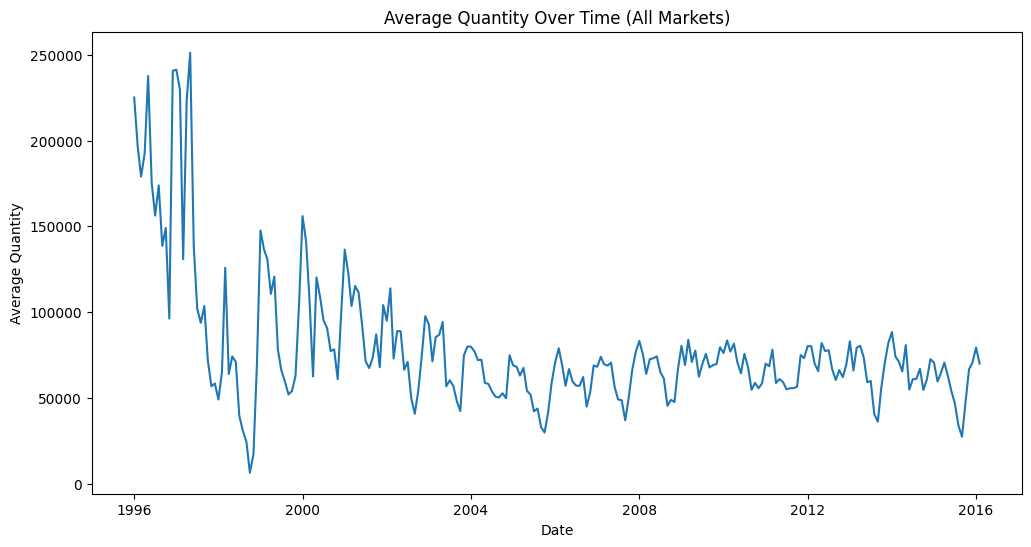

In [16]:
# Plot the average quantity
plt.figure(figsize=(12, 6))
plt.plot(avg_quantity_over_time.index, avg_quantity_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Quantity')
plt.title('Average Quantity Over Time (All Markets)')
plt.show()

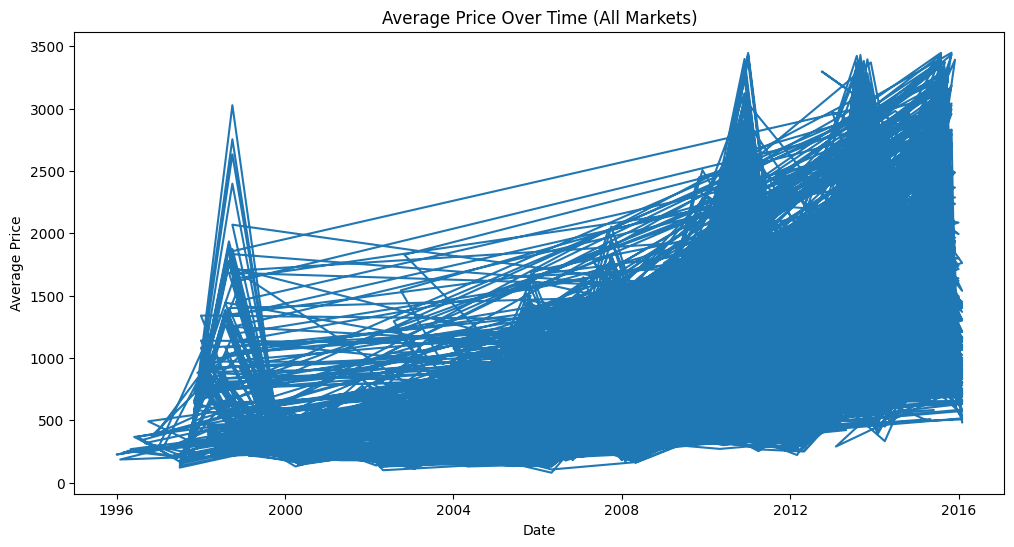

In [51]:
# Plot the average price over time
plt.figure(figsize=(12, 6))
plt.plot(df['priceMod'])
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time (All Markets)')
plt.show()

In [18]:
avg_price_over_time = df.groupby('date')['quantity'].mean()

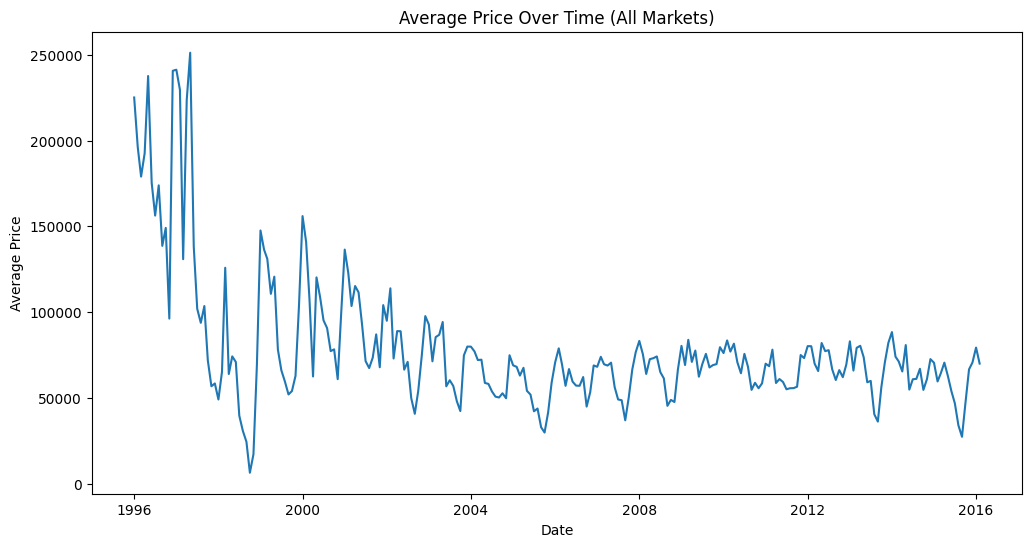

In [19]:
# Plot the average price over time
plt.figure(figsize=(12, 6))
plt.plot(avg_price_over_time.index, avg_price_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time (All Markets)')
plt.show()

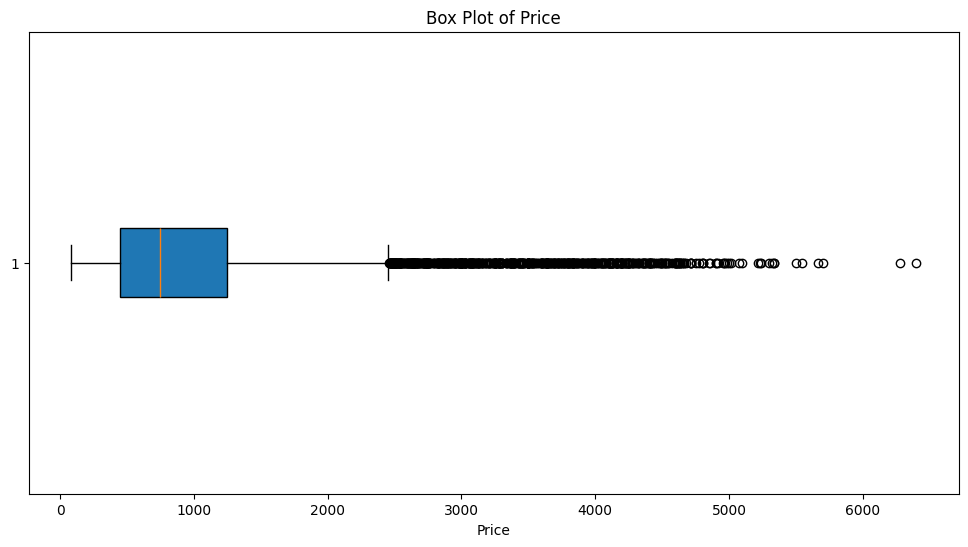

In [20]:
# Create a box plot for price
plt.figure(figsize=(12, 6))
plt.boxplot(df['priceMod'], vert=False, patch_artist=True)
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

In [21]:
# Calculate z-scores
z_scores = np.abs((df['priceMod'] - df['priceMod'].mean()) / df['priceMod'].std())

# Identify potential outliers
outliers = df[z_scores > 3]

# Print or analyze the outliers
print(outliers)

           market      month  year  quantity  priceMin  priceMax  priceMod  \
60     ABOHAR(PB)     August  2013      1072      3364      3959      3718   
67     ABOHAR(PB)  September  2013       575      4273      5109      4800   
74     ABOHAR(PB)    October  2013       400      2979      5079      4429   
187      AGRA(UP)  September  2013     30740      4098      4357      4225   
189      AGRA(UP)  September  2015     31830      3500      4468      4318   
...           ...        ...   ...       ...       ...       ...       ...   
10176   YEOLA(MS)     August  2013     68717      1425      3936      3638   
10178   YEOLA(MS)     August  2015     55819      1565      4841      4184   
10188   YEOLA(MS)  September  2013     30862      1719      5038      4633   
10190   YEOLA(MS)  September  2015     25374      1606      4621      4044   
10200   YEOLA(MS)    October  2013     16879      1334      4857      4224   

      state    city       date  
60       PB  ABOHAR 2013-08-01

In [22]:
df = df[z_scores <= 3]

In [23]:
avg_price_over_time = df.groupby('date')['priceMod'].mean()

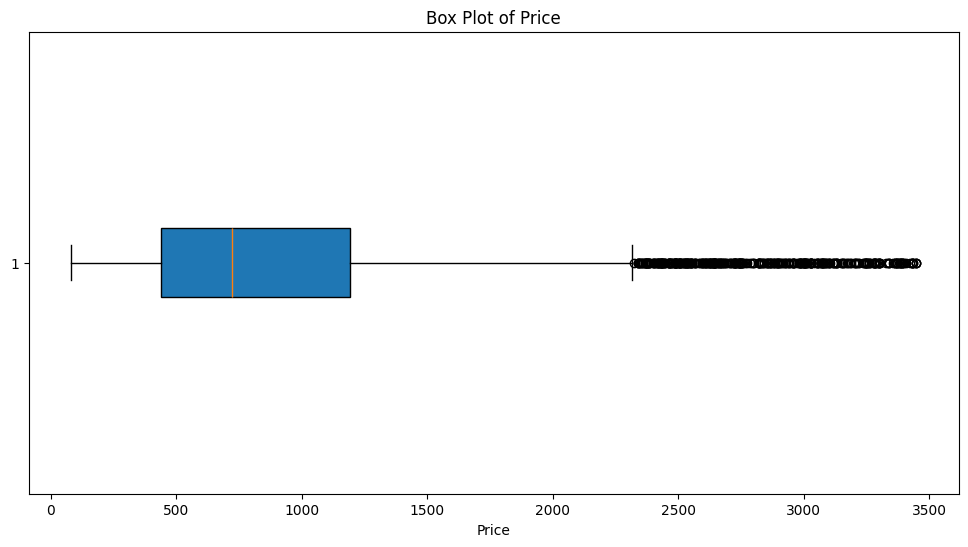

In [24]:
plt.figure(figsize=(12, 6))
plt.boxplot(df['priceMod'], vert=False, patch_artist=True)
plt.xlabel('Price')
plt.title('Box Plot of Price')
plt.show()

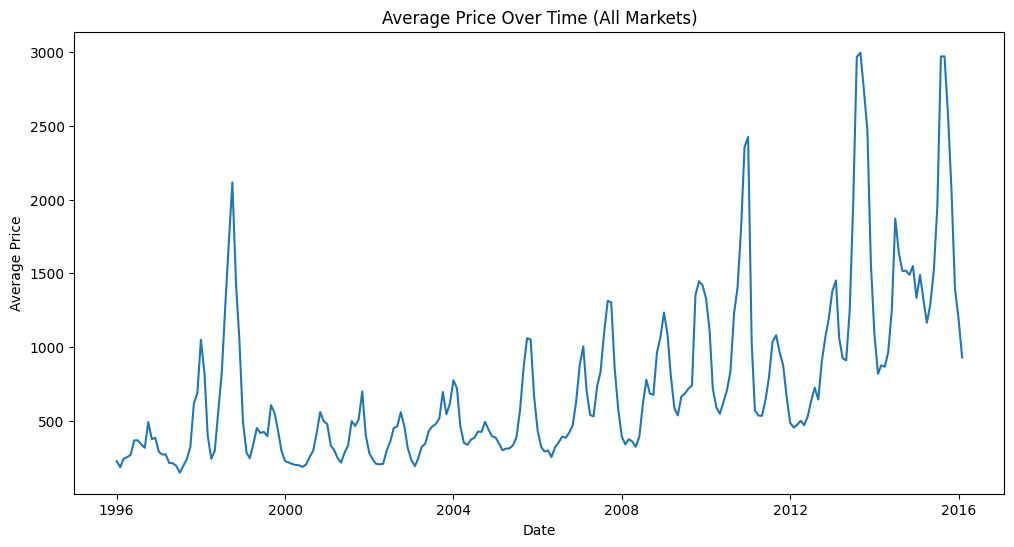

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(avg_price_over_time.index, avg_price_over_time.values)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Price Over Time (All Markets)')
plt.show()

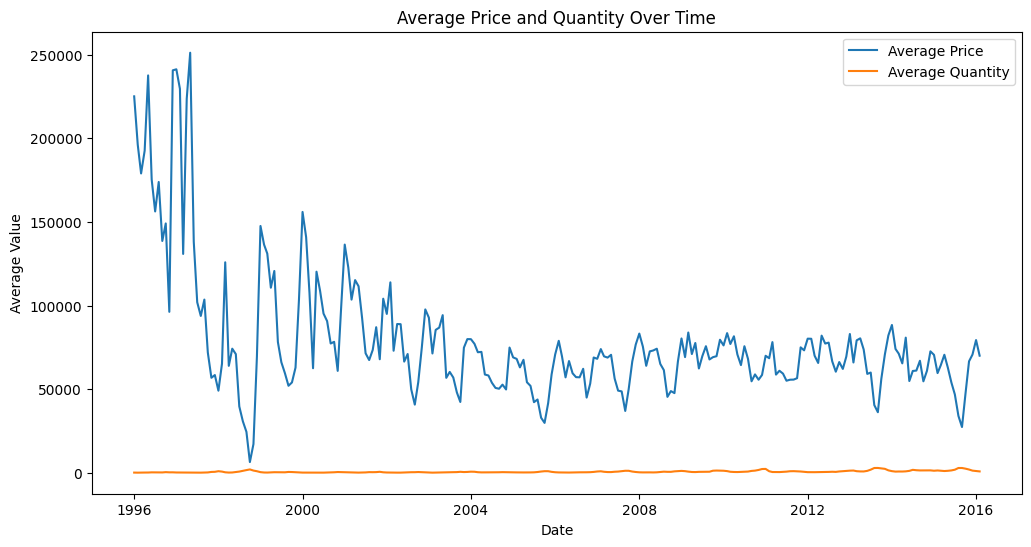

In [26]:
# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(avg_quantity_over_time.index, avg_quantity_over_time.values,label='Average Price')
plt.plot(avg_price_over_time.index, avg_price_over_time.values, label='Average Quantity')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Value')
plt.title('Average Price and Quantity Over Time')

# Add legend
plt.legend()

# Show the plot
plt.show()

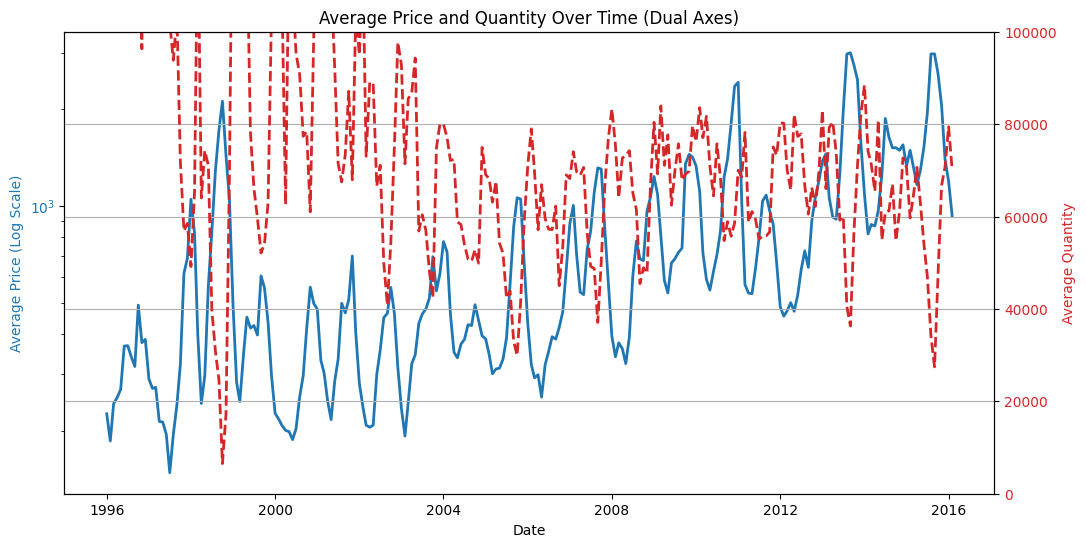

In [27]:
# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average price on the first axis (logarithmic scale)
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Price (Log Scale)', color=color)
ax1.plot(avg_price_over_time.index, avg_price_over_time.values, color=color, linestyle='-', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_yscale('log')  # Set logarithmic scale for price

# Create a second axis for average quantity
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Quantity', color=color)
ax2.plot(avg_quantity_over_time.index, avg_quantity_over_time.values, color=color, linestyle='--', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Adjust y-axis limits for quantity
ax2.set_ylim(0, 100000)

# Add title, legend, and gridlines
plt.title('Average Price and Quantity Over Time (Dual Axes)')
plt.grid(True)
plt.show()

In [28]:
df = df.set_index('date')

In [29]:
train_data = df[:-int(len(df) * 0.2)]  # 80% for training
test_data = df[-int(len(df) * 0.2):]  # 20% for testing

In [30]:
train_avg_quantity_over_time = train_data.groupby('date')['quantity'].mean()
train_avg_price_over_time = train_data.groupby('date')['priceMod'].mean()

test_avg_quantity_over_time = test_data.groupby('date')['quantity'].mean()
test_avg_price_over_time = test_data.groupby('date')['priceMod'].mean()

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model 
# We'll fit separate ARIMA models 
model_quantity = ARIMA(train_avg_quantity_over_time, order=(5, 1, 0))  
results_quantity = model_quantity.fit()

model_priceMod = ARIMA(train_avg_price_over_time, order=(5, 1, 0))  
results_priceMod = model_priceMod.fit()
#  Make forecasts 
predictions_quantity = results_quantity.predict()
predictions_priceMod = results_priceMod.predict()

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

In [32]:
predictions_priceMod

1996-01-01       0.000000
1996-02-01     231.919739
1996-03-01     165.061835
1996-04-01     281.137055
1996-05-01     260.080294
                 ...     
2015-10-01    2717.751332
2015-11-01    2185.456093
2015-12-01    1700.101931
2016-01-01    1042.243075
2016-02-01    1320.072813
Freq: MS, Name: predicted_mean, Length: 242, dtype: float64

In [33]:
predictions_quantity.index = pd.to_datetime(predictions_quantity.index)

# Define the date range to drop
start_date = '1996-01-01'
end_date = '1997-06-30'

# Drop rows within the specified date range
filtered_predictions_quantity = predictions_quantity[
    ~((predictions_quantity.index >= start_date) & (predictions_quantity.index <= end_date))
]

# Print the filtered DataFrame to verify the result
print(filtered_predictions_quantity)

predictions_priceMod.index = pd.to_datetime(predictions_priceMod.index)

# Define the date range to drop
start_date = '1996-01-01'
end_date = '1997-06-30'

# Drop rows within the specified date range
filtered_predictions_priceMod = predictions_priceMod[
    ~((predictions_priceMod.index >= start_date) & (predictions_priceMod.index <= end_date))
]

# Print the filtered DataFrame to verify the result
print(filtered_predictions_priceMod)

filtered_predictions_quantity.index = test_avg_quantity_over_time.index
filtered_predictions_priceMod.index = test_avg_price_over_time.index

1997-07-01    140667.893278
1997-08-01    178376.908064
1997-09-01    134935.435947
1997-10-01    141617.771197
1997-11-01    127269.182829
                  ...      
2015-10-01     41751.631357
2015-11-01     54864.187648
2015-12-01     68923.033421
2016-01-01     73379.382832
2016-02-01     73324.957008
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64
1997-07-01     197.424357
1997-08-01     141.959336
1997-09-01     245.302916
1997-10-01     263.209457
1997-11-01     366.879733
                 ...     
2015-10-01    2717.751332
2015-11-01    2185.456093
2015-12-01    1700.101931
2016-01-01    1042.243075
2016-02-01    1320.072813
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64


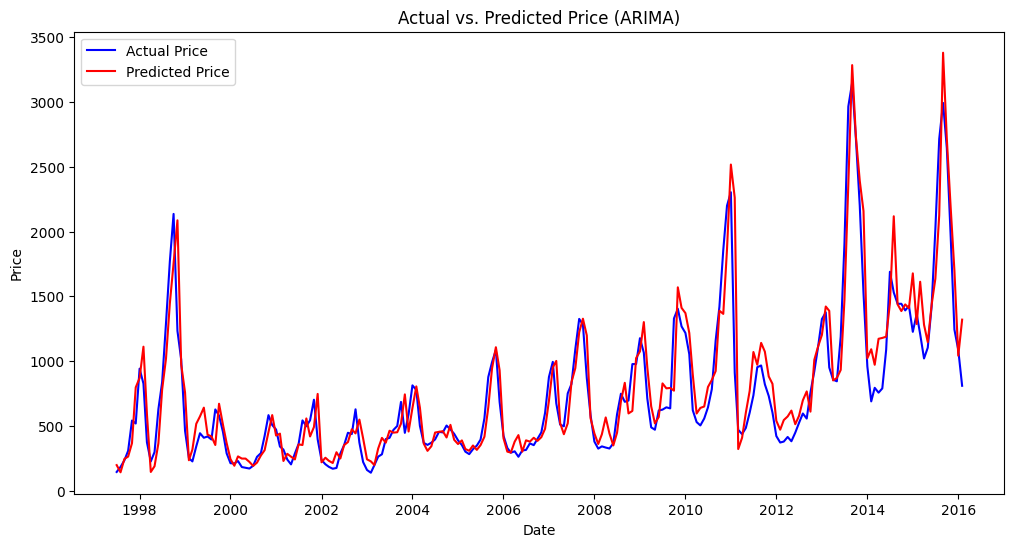

In [34]:
#  Create a plot
plt.figure(figsize=(12, 6))

#  Plot the actual values (test data)
plt.plot(test_avg_price_over_time, label='Actual Price', color='blue')


#  Plot the predicted values
plt.plot(filtered_predictions_priceMod, label='Predicted Price', color='red')

#  Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price (ARIMA)')
plt.legend()

#  Show the plot
plt.show()

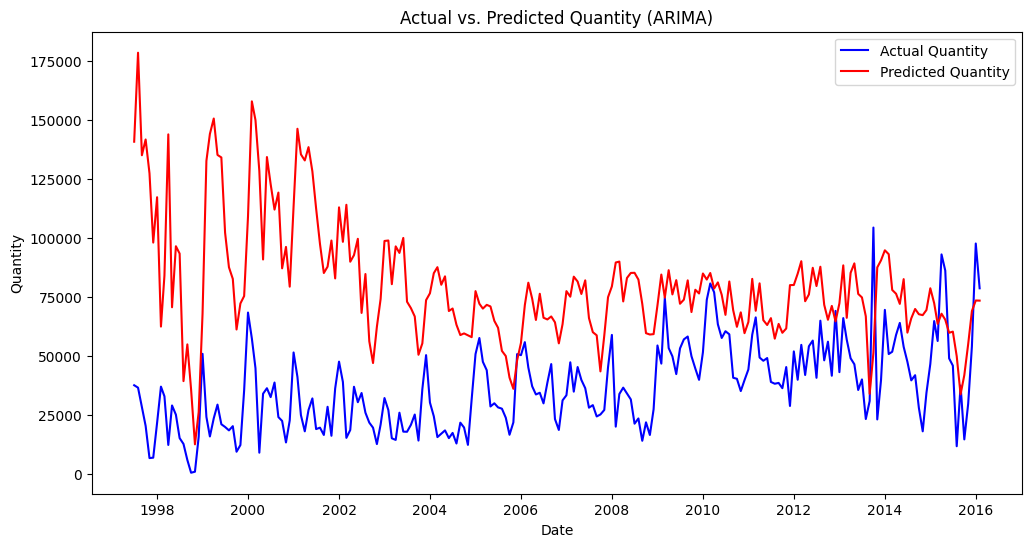

In [35]:
#  Create a plot
plt.figure(figsize=(12, 6))

#  Plot the actual values (test data)
plt.plot(test_avg_quantity_over_time, label='Actual Quantity', color='blue')


# Plot the predicted values
plt.plot(filtered_predictions_quantity, label='Predicted Quantity', color='red')

#  Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs. Predicted Quantity (ARIMA)')
plt.legend()

#  Show the plot
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#  Calculate evaluation metrics
rmse_quantity = mean_squared_error(test_avg_quantity_over_time, filtered_predictions_quantity, squared=False)
mae_quantity = mean_absolute_error(test_avg_quantity_over_time, filtered_predictions_quantity)
mse_quantity = mean_squared_error(test_avg_quantity_over_time, filtered_predictions_quantity)

rmse_priceMod = mean_squared_error(test_avg_price_over_time, filtered_predictions_priceMod, squared=False)
mae_priceMod = mean_absolute_error(test_avg_price_over_time, filtered_predictions_priceMod)
mse_priceMod = mean_squared_error(test_avg_price_over_time, filtered_predictions_priceMod)

# Print the results
print(f"Quantity RMSE: {rmse_quantity}")
print(f"Quantity MAE: {mae_quantity}")
print(f"Quantity MSE: {mse_quantity}")
print(f"PriceMod RMSE: {rmse_priceMod}")
print(f"PriceMod MAE: {mae_priceMod}")
print(f"PriceMod MSE: {mse_priceMod}")

Quantity RMSE: 53924.8770484682
Quantity MAE: 44796.57496236791
Quantity MSE: 2907892364.6924124
PriceMod RMSE: 218.06618017435457
PriceMod MAE: 145.46772795321027
PriceMod MSE: 47552.85893583407


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

seasonal_order = (1, 1, 1, 12)  

# Fit the SARIMA model for quantity
model_quantity = SARIMAX(train_avg_quantity_over_time, order=(5, 1, 0), seasonal_order=seasonal_order)
results_quantity = model_quantity.fit()

# Fit the SARIMA model for priceMod
model_priceMod = SARIMAX(train_avg_price_over_time, order=(5, 1, 0), seasonal_order=seasonal_order)
results_priceMod = model_priceMod.fit()

# Make forecasts
predictions_quantity = results_quantity.predict()
predictions_priceMod = results_priceMod.predict()

# Print the results
print(predictions_quantity)
print(predictions_priceMod)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1996-01-01         0.000000
1996-02-01    182687.818191
1996-03-01    148102.724577
1996-04-01    168277.968277
1996-05-01    204514.199146
                  ...      
2015-10-01     49195.917070
2015-11-01     61060.200831
2015-12-01     75558.914689
2016-01-01     79119.310788
2016-02-01     66426.041558
Freq: MS, Name: predicted_mean, Length: 242, dtype: float64
1996-01-01       0.000000
1996-02-01     231.860357
1996-03-01     182.912044
1996-04-01     242.028051
1996-05-01     250.092327
                 ...     
2015-10-01    2777.311719
2015-11-01    2271.069915
2015-12-01    1712.532383
2016-01-01    1203.722850
2016-02-01    1145.460067
Freq: MS, Name: predicted_mean, Length: 242, dtype: float64


In [38]:
predictions_quantity.index = pd.to_datetime(predictions_quantity.index)

# Define the date range to drop
start_date = '1996-01-01'
end_date = '1997-06-30'

# Drop rows within the specified date range
filtered_predictions_quantity = predictions_quantity[
    ~((predictions_quantity.index >= start_date) & (predictions_quantity.index <= end_date))
]

# Print the filtered DataFrame to verify the result
print(filtered_predictions_quantity)

predictions_priceMod.index = pd.to_datetime(predictions_priceMod.index)

# Define the date range to drop
start_date = '1996-01-01'
end_date = '1997-06-30'

# Drop rows within the specified date range
filtered_predictions_priceMod = predictions_priceMod[
    ~((predictions_priceMod.index >= start_date) & (predictions_priceMod.index <= end_date))
]

# Print the filtered DataFrame to verify the result
print(filtered_predictions_priceMod)

filtered_predictions_quantity.index = test_avg_quantity_over_time.index
filtered_predictions_priceMod.index = test_avg_price_over_time.index

1997-07-01    137142.023022
1997-08-01    176994.963375
1997-09-01    118995.407375
1997-10-01    149325.313790
1997-11-01     95678.745286
                  ...      
2015-10-01     49195.917070
2015-11-01     61060.200831
2015-12-01     75558.914689
2016-01-01     79119.310788
2016-02-01     66426.041558
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64
1997-07-01     167.987347
1997-08-01     155.473920
1997-09-01     244.036050
1997-10-01     435.607550
1997-11-01     186.705666
                 ...     
2015-10-01    2777.311719
2015-11-01    2271.069915
2015-12-01    1712.532383
2016-01-01    1203.722850
2016-02-01    1145.460067
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#  Calculate evaluation metrics
rmse_quantity = mean_squared_error(test_avg_quantity_over_time, filtered_predictions_quantity, squared=False)
mae_quantity = mean_absolute_error(test_avg_quantity_over_time, filtered_predictions_quantity)
mse_quantity = mean_squared_error(test_avg_quantity_over_time, filtered_predictions_quantity)

rmse_priceMod = mean_squared_error(test_avg_price_over_time, filtered_predictions_priceMod, squared=False)
mae_priceMod = mean_absolute_error(test_avg_price_over_time, filtered_predictions_priceMod)
mse_priceMod = mean_squared_error(test_avg_price_over_time, filtered_predictions_priceMod)

# Print the results
print(f"Quantity RMSE: {rmse_quantity}")
print(f"Quantity MAE: {mae_quantity}")
print(f"Quantity MSE: {mse_quantity}")
print(f"PriceMod RMSE: {rmse_priceMod}")
print(f"PriceMod MAE: {mae_priceMod}")
print(f"PriceMod MSE: {mse_priceMod}")

Quantity RMSE: 57401.911604022185
Quantity MAE: 45988.06155505837
Quantity MSE: 3294979455.795977
PriceMod RMSE: 215.8925189724444
PriceMod MAE: 149.581909680747
PriceMod MSE: 46609.57974826727


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


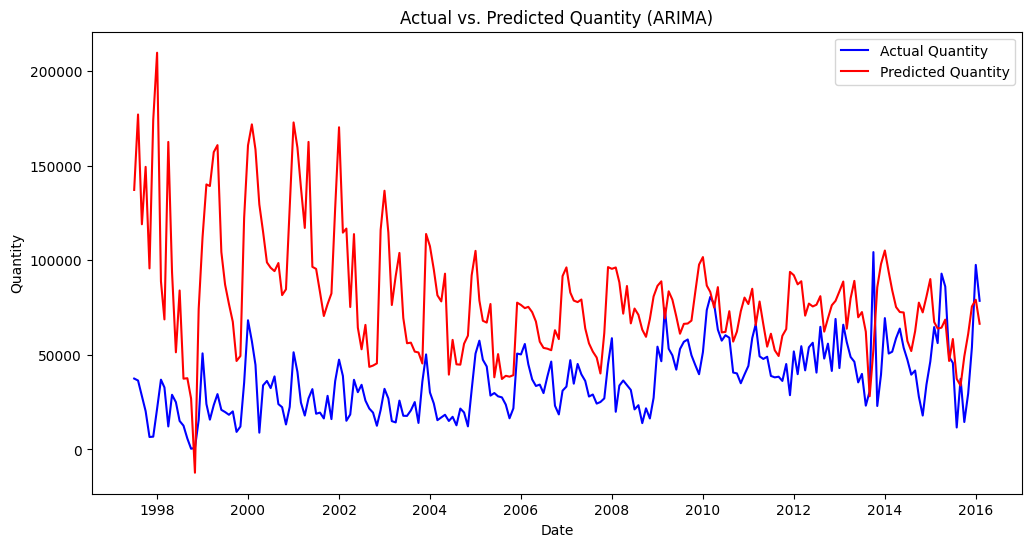

In [40]:
#  Create a plot
plt.figure(figsize=(12, 6))

# Plot the actual values (test data)
plt.plot(test_avg_quantity_over_time, label='Actual Quantity', color='blue')

#  Plot the predicted values
plt.plot(filtered_predictions_quantity, label='Predicted Quantity', color='red')

#  Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs. Predicted Quantity (ARIMA)')
plt.legend()

#  Show the plot
plt.show()

In [ ]:
from pmdarima import auto_arima

model = auto_arima(df['quantity'], seasonal=True, m=12)  # m is the seasonal period

# Extract the best order and seasonal order
best_order = model.order
best_seasonal_order = model.seasonal_order

best_order = (2, 1, 3)
best_seasonal_order = (1, 0, 1, 12)

In [41]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

seasonal_order = (1, 1, 1, 12)  

# Fit the SARIMA model for quantity
model_quantity = SARIMAX(train_avg_quantity_over_time, order=(2, 1, 3), seasonal_order=(1, 0, 1, 12))
results_quantity = model_quantity.fit()

# Fit the SARIMA model for priceMod
model_priceMod = SARIMAX(train_avg_price_over_time, order=(2, 1, 3), seasonal_order=(1, 0, 1, 12))
results_priceMod = model_priceMod.fit()

# Make forecasts
predictions_quantity = results_quantity.predict()
predictions_priceMod = results_priceMod.predict()

# Print the results
print(predictions_quantity)
print(predictions_priceMod)

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1996-01-01         0.000000
1996-02-01    169545.729377
1996-03-01    166416.498230
1996-04-01    175672.647711
1996-05-01    167725.575284
                  ...      
2015-10-01     49825.818303
2015-11-01     57523.615807
2015-12-01     80227.469617
2016-01-01     75802.976429
2016-02-01     73614.414338
Freq: MS, Name: predicted_mean, Length: 242, dtype: float64
1996-01-01       0.000000
1996-02-01     231.726225
1996-03-01     165.564790
1996-04-01     281.125122
1996-05-01     255.896460
                 ...     
2015-10-01    2650.348998
2015-11-01    2177.795850
2015-12-01    1555.544222
2016-01-01    1114.839356
2016-02-01    1077.423250
Freq: MS, Name: predicted_mean, Length: 242, dtype: float64


In [42]:
predictions_quantity.index = pd.to_datetime(predictions_quantity.index)

# Define the date range to drop
start_date = '1996-01-01'
end_date = '1997-06-30'

# Drop rows within the specified date range
filtered_predictions_quantity = predictions_quantity[
    ~((predictions_quantity.index >= start_date) & (predictions_quantity.index <= end_date))
]

# Print the filtered DataFrame to verify the result
print(filtered_predictions_quantity)

predictions_priceMod.index = pd.to_datetime(predictions_priceMod.index)

# Define the date range to drop
start_date = '1996-01-01'
end_date = '1997-06-30'

# Drop rows within the specified date range
filtered_predictions_priceMod = predictions_priceMod[
    ~((predictions_priceMod.index >= start_date) & (predictions_priceMod.index <= end_date))
]

# Print the filtered DataFrame to verify the result
print(filtered_predictions_priceMod)

filtered_predictions_quantity.index = test_avg_quantity_over_time.index
filtered_predictions_priceMod.index = test_avg_price_over_time.index

1997-07-01    154423.123718
1997-08-01    148093.764684
1997-09-01    131016.527355
1997-10-01    146809.405499
1997-11-01    105981.675152
                  ...      
2015-10-01     49825.818303
2015-11-01     57523.615807
2015-12-01     80227.469617
2016-01-01     75802.976429
2016-02-01     73614.414338
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64
1997-07-01     233.631715
1997-08-01     171.846790
1997-09-01     255.192456
1997-10-01     206.494397
1997-11-01     415.244493
                 ...     
2015-10-01    2650.348998
2015-11-01    2177.795850
2015-12-01    1555.544222
2016-01-01    1114.839356
2016-02-01    1077.423250
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64


In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#  Calculate evaluation metrics
rmse_quantity = mean_squared_error(test_avg_quantity_over_time, filtered_predictions_quantity, squared=False)
mae_quantity = mean_absolute_error(test_avg_quantity_over_time, filtered_predictions_quantity)
mse_quantity = mean_squared_error(test_avg_quantity_over_time, filtered_predictions_quantity)

rmse_priceMod = mean_squared_error(test_avg_price_over_time, filtered_predictions_priceMod, squared=False)
mae_priceMod = mean_absolute_error(test_avg_price_over_time, filtered_predictions_priceMod)
mse_priceMod = mean_squared_error(test_avg_price_over_time, filtered_predictions_priceMod)

# Print the results
print(f"Quantity RMSE: {rmse_quantity}")
print(f"Quantity MAE: {mae_quantity}")
print(f"Quantity MSE: {mse_quantity}")
print(f"PriceMod RMSE: {rmse_priceMod}")
print(f"PriceMod MAE: {mae_priceMod}")
print(f"PriceMod MSE: {mse_priceMod}")

Quantity RMSE: 55391.996744981996
Quantity MAE: 46170.61245679012
Quantity MSE: 3068273303.3960958
PriceMod RMSE: 206.7684990258459
PriceMod MAE: 143.47507186877655
PriceMod MSE: 42753.21218940123


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


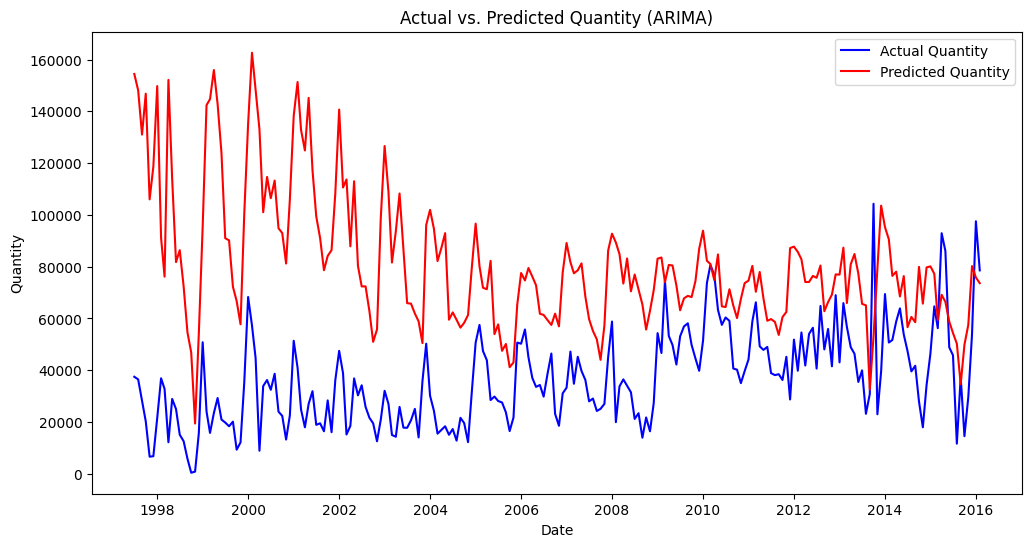

In [44]:
# Create a plot
plt.figure(figsize=(12, 6))

#  Plot the actual values (test data)
plt.plot(test_avg_quantity_over_time, label='Actual Quantity', color='blue')

#  Plot the predicted values
plt.plot(filtered_predictions_quantity, label='Predicted Quantity', color='red')

#  Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs. Predicted Quantity (ARIMA)')
plt.legend()

#  Show the plot
plt.show()

In [45]:
from statsmodels.tsa.arima.model import ARIMA
training_data = pd.DataFrame({'quantity': train_avg_quantity_over_time, 'priceMod': train_avg_price_over_time})


# Select the relevant columns for forecasting
data = training_data[['quantity', 'priceMod']]  

#  Create Lagged Variables
data['quantity_lag1'] = data['quantity'].shift(1)
data['priceMod_lag1'] = data['priceMod'].shift(1)


#  Remove the first row (which will have NaN values due to the shift)
data = data.dropna()

#  Select the relevant columns for forecasting (including lagged variables)
data = data[['quantity', 'priceMod', 'quantity_lag1', 'priceMod_lag1']]

#  Fit the ARIMA model (adjust order as needed)
# We'll fit separate ARIMA models for quantity and priceMod
model_quantity = ARIMA(data['quantity'], order=(5, 1, 0))  # Pass a DataFrame
results_quantity = model_quantity.fit()

model_priceMod = ARIMA(data['priceMod'], order=(5, 1, 0))  # Pass a DataFrame
results_priceMod = model_priceMod.fit()

#  Make forecasts (adjust as needed)
last_observation = data.values[-1][[0, 1, 2, 3]]  # Select the relevant columns
predictions_quantity = results_quantity.predict()
predictions_priceMod = results_priceMod.predict()



C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: 

In [46]:
predictions_quantity.index = pd.to_datetime(predictions_quantity.index)

# Define the date range to drop
start_date = '1996-01-01'
end_date = '1997-06-30'

# Drop rows within the specified date range
filtered_predictions_quantity = predictions_quantity[
    ~((predictions_quantity.index >= start_date) & (predictions_quantity.index <= end_date))
]

# Print the filtered DataFrame to verify the result
print(filtered_predictions_quantity)

predictions_priceMod.index = pd.to_datetime(predictions_priceMod.index)

# Define the date range to drop
start_date = '1996-01-01'
end_date = '1997-06-30'

# Drop rows within the specified date range
filtered_predictions_priceMod = predictions_priceMod[
    ~((predictions_priceMod.index >= start_date) & (predictions_priceMod.index <= end_date))
]

# Print the filtered DataFrame to verify the result
print(filtered_predictions_priceMod)

filtered_predictions_quantity.index = test_avg_quantity_over_time.index
filtered_predictions_priceMod.index = test_avg_price_over_time.index

1997-07-01    153564.853046
1997-08-01    165147.393587
1997-09-01    131816.391702
1997-10-01    153630.776107
1997-11-01    124212.328005
                  ...      
2015-10-01     41402.689194
2015-11-01     55252.877765
2015-12-01     71220.054998
2016-01-01     72709.212400
2016-02-01     71982.920543
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64
1997-07-01     197.430736
1997-08-01     141.901110
1997-09-01     245.342989
1997-10-01     263.206602
1997-11-01     366.863886
                 ...     
2015-10-01    2717.610759
2015-11-01    2185.426191
2015-12-01    1700.761379
2016-01-01    1041.989357
2016-02-01    1319.898314
Freq: MS, Name: predicted_mean, Length: 224, dtype: float64


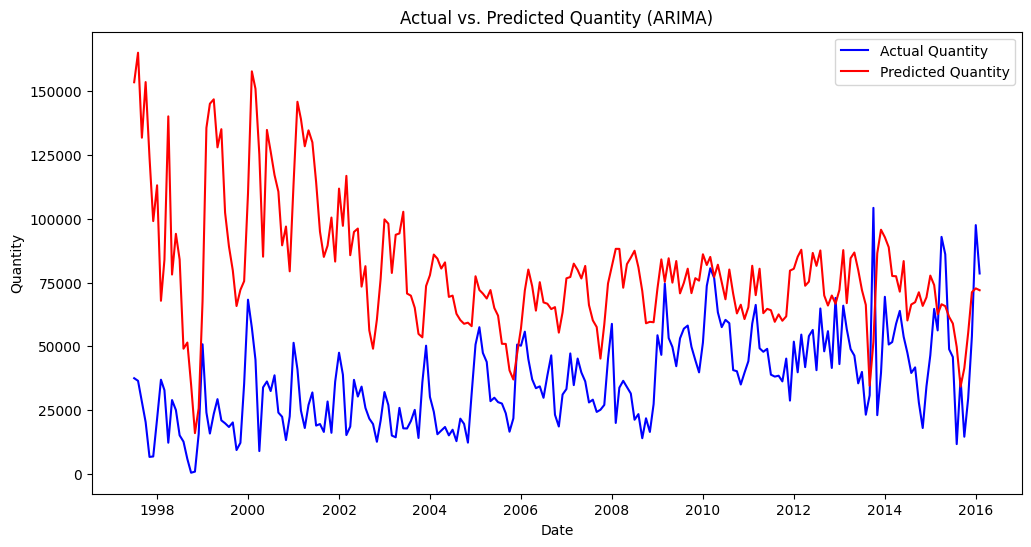

In [47]:
#  Create a plot
plt.figure(figsize=(12, 6))

#  Plot the actual values (test data)
plt.plot(test_avg_quantity_over_time, label='Actual Quantity', color='blue')

#  Plot the predicted values
plt.plot(filtered_predictions_quantity, label='Predicted Quantity', color='red')

#  Add labels and title
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Actual vs. Predicted Quantity (ARIMA)')
plt.legend()

#  Show the plot
plt.show()

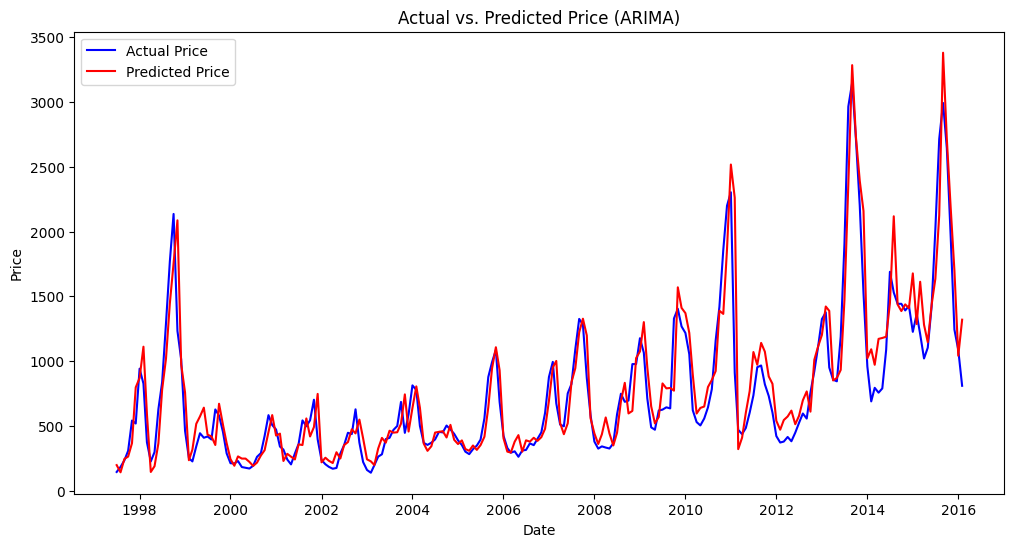

In [48]:
#  Create a plot
plt.figure(figsize=(12, 6))

#  Plot the actual values (test data)
plt.plot(test_avg_price_over_time, label='Actual Price', color='blue')

#  Plot the predicted values
plt.plot(filtered_predictions_priceMod, label='Predicted Price', color='red')

#  Add labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price (ARIMA)')
plt.legend()

#  Show the plot
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
#  Calculate evaluation metrics
rmse_quantity = mean_squared_error(test_avg_quantity_over_time, filtered_predictions_quantity, squared=False)
mae_quantity = mean_absolute_error(test_avg_quantity_over_time, filtered_predictions_quantity)
mse_quantity = mean_squared_error(test_avg_quantity_over_time, filtered_predictions_quantity)

rmse_priceMod = mean_squared_error(test_avg_price_over_time, filtered_predictions_priceMod, squared=False)
mae_priceMod = mean_absolute_error(test_avg_price_over_time, filtered_predictions_priceMod)
mse_priceMod = mean_squared_error(test_avg_price_over_time, filtered_predictions_priceMod)

# Print the results
print(f"Quantity RMSE: {rmse_quantity}")
print(f"Quantity MAE: {mae_quantity}")
print(f"Quantity MSE: {mse_quantity}")
print(f"PriceMod RMSE: {rmse_priceMod}")
print(f"PriceMod MAE: {mae_priceMod}")
print(f"PriceMod MSE: {mse_priceMod}")

Quantity RMSE: 53818.96364886005
Quantity MAE: 44843.29582457106
Quantity MSE: 2896480848.2373195
PriceMod RMSE: 218.06943123445328
PriceMod MAE: 145.4666795579942
PriceMod MSE: 47554.27683891795


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
